## X Sentiment Analysis on Russia-Ukraine War Using Python
This article discusses how to conduct X sentiment analysis on the Russia-Ukraine War using Python.<br><br>
Social media plays a significant role in shaping public opinion, allowing for the widespread sharing of information. Following reports of a potential Russia-Ukraine war, users worldwide flooded the platform with their viewpoints. Analyzing these opinions can provide insight into public sentiment surrounding events preceding and during the war. Tweets containing search keywords related to the Russian invasion of Ukraine, such as #UkraineWar, #RussiaInvade, #StandwithUkraine, and #UkraineNATO, were collected from January 2022 to the first week of March 2022. The goal is to understand global sentiment during these events.<br><br>
To analyze sentiment and process the data, we'll need to import specific dependencies.

## Libraries

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
import seaborn as sns

from PIL import Image
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer


## Dataset Loading
The dataset containing tweets related to the Russia-Ukraine war spanning 65 days is accessible at this [kaggle link](https://www.kaggle.com/datasets/foklacu/ukraine-war-tweets-dataset-65-days?select=Ukraine_war.csv). It covers tweets from January 1st, 2022, to March 6th, 2022, encompassing both the pre- and peak-invasion periods. Each day's data comprises a maximum of 5000 tweets, gathered using search keywords such as 'Ukraine war', 'Ukraine troops', 'Ukraine border', 'Ukraine NATO', 'StandwithUkraine', 'Russian troops', 'Russian border Ukraine', and 'Russia invade'. The dataset is segmented into 8 Comma-Separated Values (CSV) files based on these search keywords. These files can be extracted and loaded into a Pandas DataFrame. Below is the code for loading the dataset:

In [2]:
# Path to the directory containing the CSV files
path_dataset='./dataset'

# List to store the DataFrames
tweets=[]

# Enumerate all the files in the directory
for filename in os.listdir(path_dataset):
    if filename.endswith('.csv'):  # Only consider CSV files
        filepath = os.path.join(path_dataset, filename)
        # Read the CSV file and add the DataFrame to the list
        df=pd.read_csv(filepath)
        tweets.append(df)

So, here we have loaded all the 8 CSV files in a Pandas DataFrame
### Removing Duplicates
Then te most importan thing was to remove any duplicate tweets from the dataset. Below codes helps us to do so.

In [3]:
for df in tweets:
    df.drop_duplicates(inplace=True)

## Preprocessing
The data column present in the dataset has both data and time. For the next prrcessing steps, it is helpful to remove the time portion for it. Below codes will hel to do so.

In [4]:
# Slicing the date, and removing the time portion
for df in tweets:
    df['date'] = df['date'].str.slice(0, 10)

Now, we have tweets are in 61 different languages for 65 days.

In [5]:
# Checking all the unique dates in the dataset
unique_dates = [df['date'].unique() for df in tweets]
print(unique_dates)

[array(['2022-03-05', '2022-03-04', '2022-03-03', '2022-03-02',
       '2022-03-01', '2022-02-28', '2022-02-27', '2022-02-26',
       '2022-02-25', '2022-02-24', '2022-02-23', '2022-02-22',
       '2022-02-21', '2022-02-20', '2022-02-19', '2022-02-18',
       '2022-02-17', '2022-02-16', '2022-02-15', '2022-02-14',
       '2022-02-13', '2022-02-12', '2022-02-11', '2022-02-10',
       '2022-02-09', '2022-02-08', '2022-02-07', '2022-02-06',
       '2022-02-05', '2022-02-04', '2022-02-03', '2022-02-02',
       '2022-02-01', '2022-01-31', '2022-01-30', '2022-01-29',
       '2022-01-28', '2022-01-27', '2022-01-26', '2022-01-25',
       '2022-01-24', '2022-01-23', '2022-01-22', '2022-01-21',
       '2022-01-20', '2022-01-19', '2022-01-18', '2022-01-17',
       '2022-01-16', '2022-01-15', '2022-01-14', '2022-01-13',
       '2022-01-12', '2022-01-11', '2022-01-10', '2022-01-09',
       '2022-01-08', '2022-01-07', '2022-01-06', '2022-01-05',
       '2022-01-04', '2022-01-03', '2022-01-02', '2022

In [6]:
# Checking how many unique language tweets are present in the dataset
unique_lang = [df['lang'].unique() for df in tweets]
print(unique_lang)

[array(['en', 'es', 'und', 'hi', 'in', 'de', 'ja', 'pl', 'et', 'zh', 'ro',
       'nl', 'tr', 'pa', 'da', 'pt', 'tl', 'eu', 'fr', 'no', 'cs', 'ru',
       'fi', 'it', 'sv', 'ca', 'kn', 'sl', 'ta', 'ar', 'ko', 'ur', 'bn',
       'gu'], dtype=object), array(['en', 'ca', 'ja', 'und', 'tl', 'fi', 'uk', 'de', 'ro', 'ru', 'fr',
       'lv', 'in', 'tr', 'et', 'nl', 'da', 'ne', 'cs', 'ml', 'es', 'pl',
       'pa', 'zh', 'it', 'sv', 'pt', 'sd', 'hi', 'ht', 'cy', 'no', 'el',
       'hu', 'fa', 'ur', 'ko', 'lt', 'gu', 'my', 'vi', 'ar', 'ta', 'te',
       'bn', 'sl', 'iw', 'th'], dtype=object), array(['en', 'pt', 'zh', 'nl', 'it', 'es', 'de', 'ca', 'cy', 'fr', 'tr',
       'ro', 'pl', 'cs', 'ja', 'in', 'hi', 'und', 'sv', 'tl', 'et', 'fi',
       'da', 'no', 'el', 'ht', 'ru', 'ar', 'ko', 'fa', 'sl', 'iw', 'dv',
       'ta', 'lv'], dtype=object), array(['en', 'ja', 'ca', 'und', 'es', 'fr', 'fi', 'ro', 'cs', 'ru', 'ka',
       'de', 'tl', 'ko', 'et', 'fa', 'it', 'uk', 'th', 'pl', 'tr', 'nl',
       '

Now we will take only English tweets and remove all the non-English tweets. The below code snippet will help us.

In [7]:
# Before removing the non-english tweets
shapes = [df.shape for df in tweets]
for shape in shapes:
    print(shape)

(53040, 29)
(128405, 29)
(170835, 29)
(148145, 29)
(163823, 29)
(245232, 29)
(172714, 29)
(231624, 29)


In [8]:
# Removing all the tweets except the non-english tweets
tweets = [df[df['lang'] == 'en'] for df in tweets if 'lang' in df.columns]

In [9]:
# Only the number of english tweets
shapes = [df.shape for df in tweets]
for shape in shapes:
    print(shape)

(52616, 29)
(126962, 29)
(165649, 29)
(87819, 29)
(161965, 29)
(217862, 29)
(171479, 29)
(219866, 29)


In [10]:
# Removing RT, punctuation, etc
def remove_rt(x):
    return re.sub('RT @\w+: ', " ", x)

def rt(x):
    return re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x)

In [11]:
tweets = [df.assign(content=df['content'].map(remove_rt).map(rt)) for df in tweets if 'content' in df.columns]

In [12]:
tweets = [df.assign(content=df['content'].str.lower()) for df in tweets if 'content' in df.columns]

The comparison of texts before and after this operation.
![comparison](gfgsm1.png)


## Sentiment Analysis
The sentiment analysis process involves several steps: data collection, analysis, preprocessing, sentiment identification, feature selection, sentiment classification, and removal of polarity and subjectivity. The TextBlob library is utilized for sentiment analysis of the tweets. A tweet's sentiment is determined by comparing its negative score to its positive score; if the negative score exceeds the positive score, the tweet is marked as negative; if the opposite is true, it's marked as positive; otherwise, it's labeled as neutral. The number of tweets for each unique day in the sample dataset is tallied, and then the percentages of positive, negative, and neutral tweets for each day are calculated. This aids in understanding people's reactions on a day-to-day basis. Below is a code snippet illustrating the sentiment analysis process.

In [13]:
for df in tweets:
    df[['polarity', 'subjectivity']] = df['content'].apply(lambda text: pd.Series(TextBlob(text).sentiment))

In [14]:
for df in tweets:
    sid = SentimentIntensityAnalyzer()
    for index, row in df.iterrows():
        score=sid.polarity_scores(row['content'])
        neg=score['neg']
        neu=score['neu']
        pos=score['pos']
        comp=score['compound']
        
        if neg > pos:
            df.at[index, 'sentiment']='negative'
        elif pos > neg:
            df.at[index, 'sentiment']='positive'
        else:
            df.at[index, 'sentiment']='neutral'
        
        df.at[index, 'neg']=neg
        df.at[index, 'neu']=neu
        df.at[index, 'pos']=pos
        df.at[index, 'compound']=comp

In [15]:
for df in tweets:
    print(df[["content", "sentiment", "polarity", "subjectivity", "neg", "neu", "pos"]].head(1))

                                             content sentiment  polarity  \
0  is that the same expensive and ineffective bor...  negative   -0.1875   

   subjectivity    neg    neu  pos  
0       0.26875  0.112  0.888  0.0  
                                             content sentiment  polarity  \
0    so if putin have russian troops try to stop ...  negative       0.0   

   subjectivity    neg    neu  pos  
0           0.0  0.121  0.879  0.0  
                                             content sentiment  polarity  \
0  joe biden says how do we get to a place where ...   neutral       0.0   

   subjectivity  neg  neu  pos  
0           0.0  0.0  1.0  0.0  
                                             content sentiment  polarity  \
0    please get it done   arm ukraine to the teet...  negative      -0.2   

   subjectivity    neg    neu    pos  
0           0.0  0.227  0.657  0.116  
                                             content sentiment  polarity  \
0    messili israel 

Now to calculate the total percentage of positive, negative, and neutral tweets we will use the following code snippet.

In [16]:
# Initialize counts
total_pos = 0
total_neg = 0
total_neu = 0

# Iterate through each DataFrame in the list
for df in tweets:
    # Count positive sentiments
    total_pos += len(df[df['sentiment'] == "positive"])
    # Count negative sentiments
    total_neg += len(df[df['sentiment'] == "negative"])
    # Count neutral sentiments
    total_neu += len(df[df['sentiment'] == "neutral"])

# Print the total counts
print("Total positive:", total_pos)
print("Total negative:", total_neg)
print("Total neutral:", total_neu)

Total positive: 379815
Total negative: 657030
Total neutral: 167373


In [17]:
total_tweets=total_neg+total_neu+total_pos
print(f"Total tweets: {total_tweets}")

Total tweets: 1204218


In [18]:
print("Total Positive Tweets % : {:.2f}".format((total_pos/total_tweets)*100))
print("Total Negative Tweets % : {:.2f}".format((total_neg/total_tweets)*100))
print("Total Neutral Tweets % : {:.2f}".format((total_neu/total_tweets)*100))

Total Positive Tweets % : 31.54
Total Negative Tweets % : 54.56
Total Neutral Tweets % : 13.90


If we want to displa this result using Pie Chart, then we can do that with the help of the below code snippet.

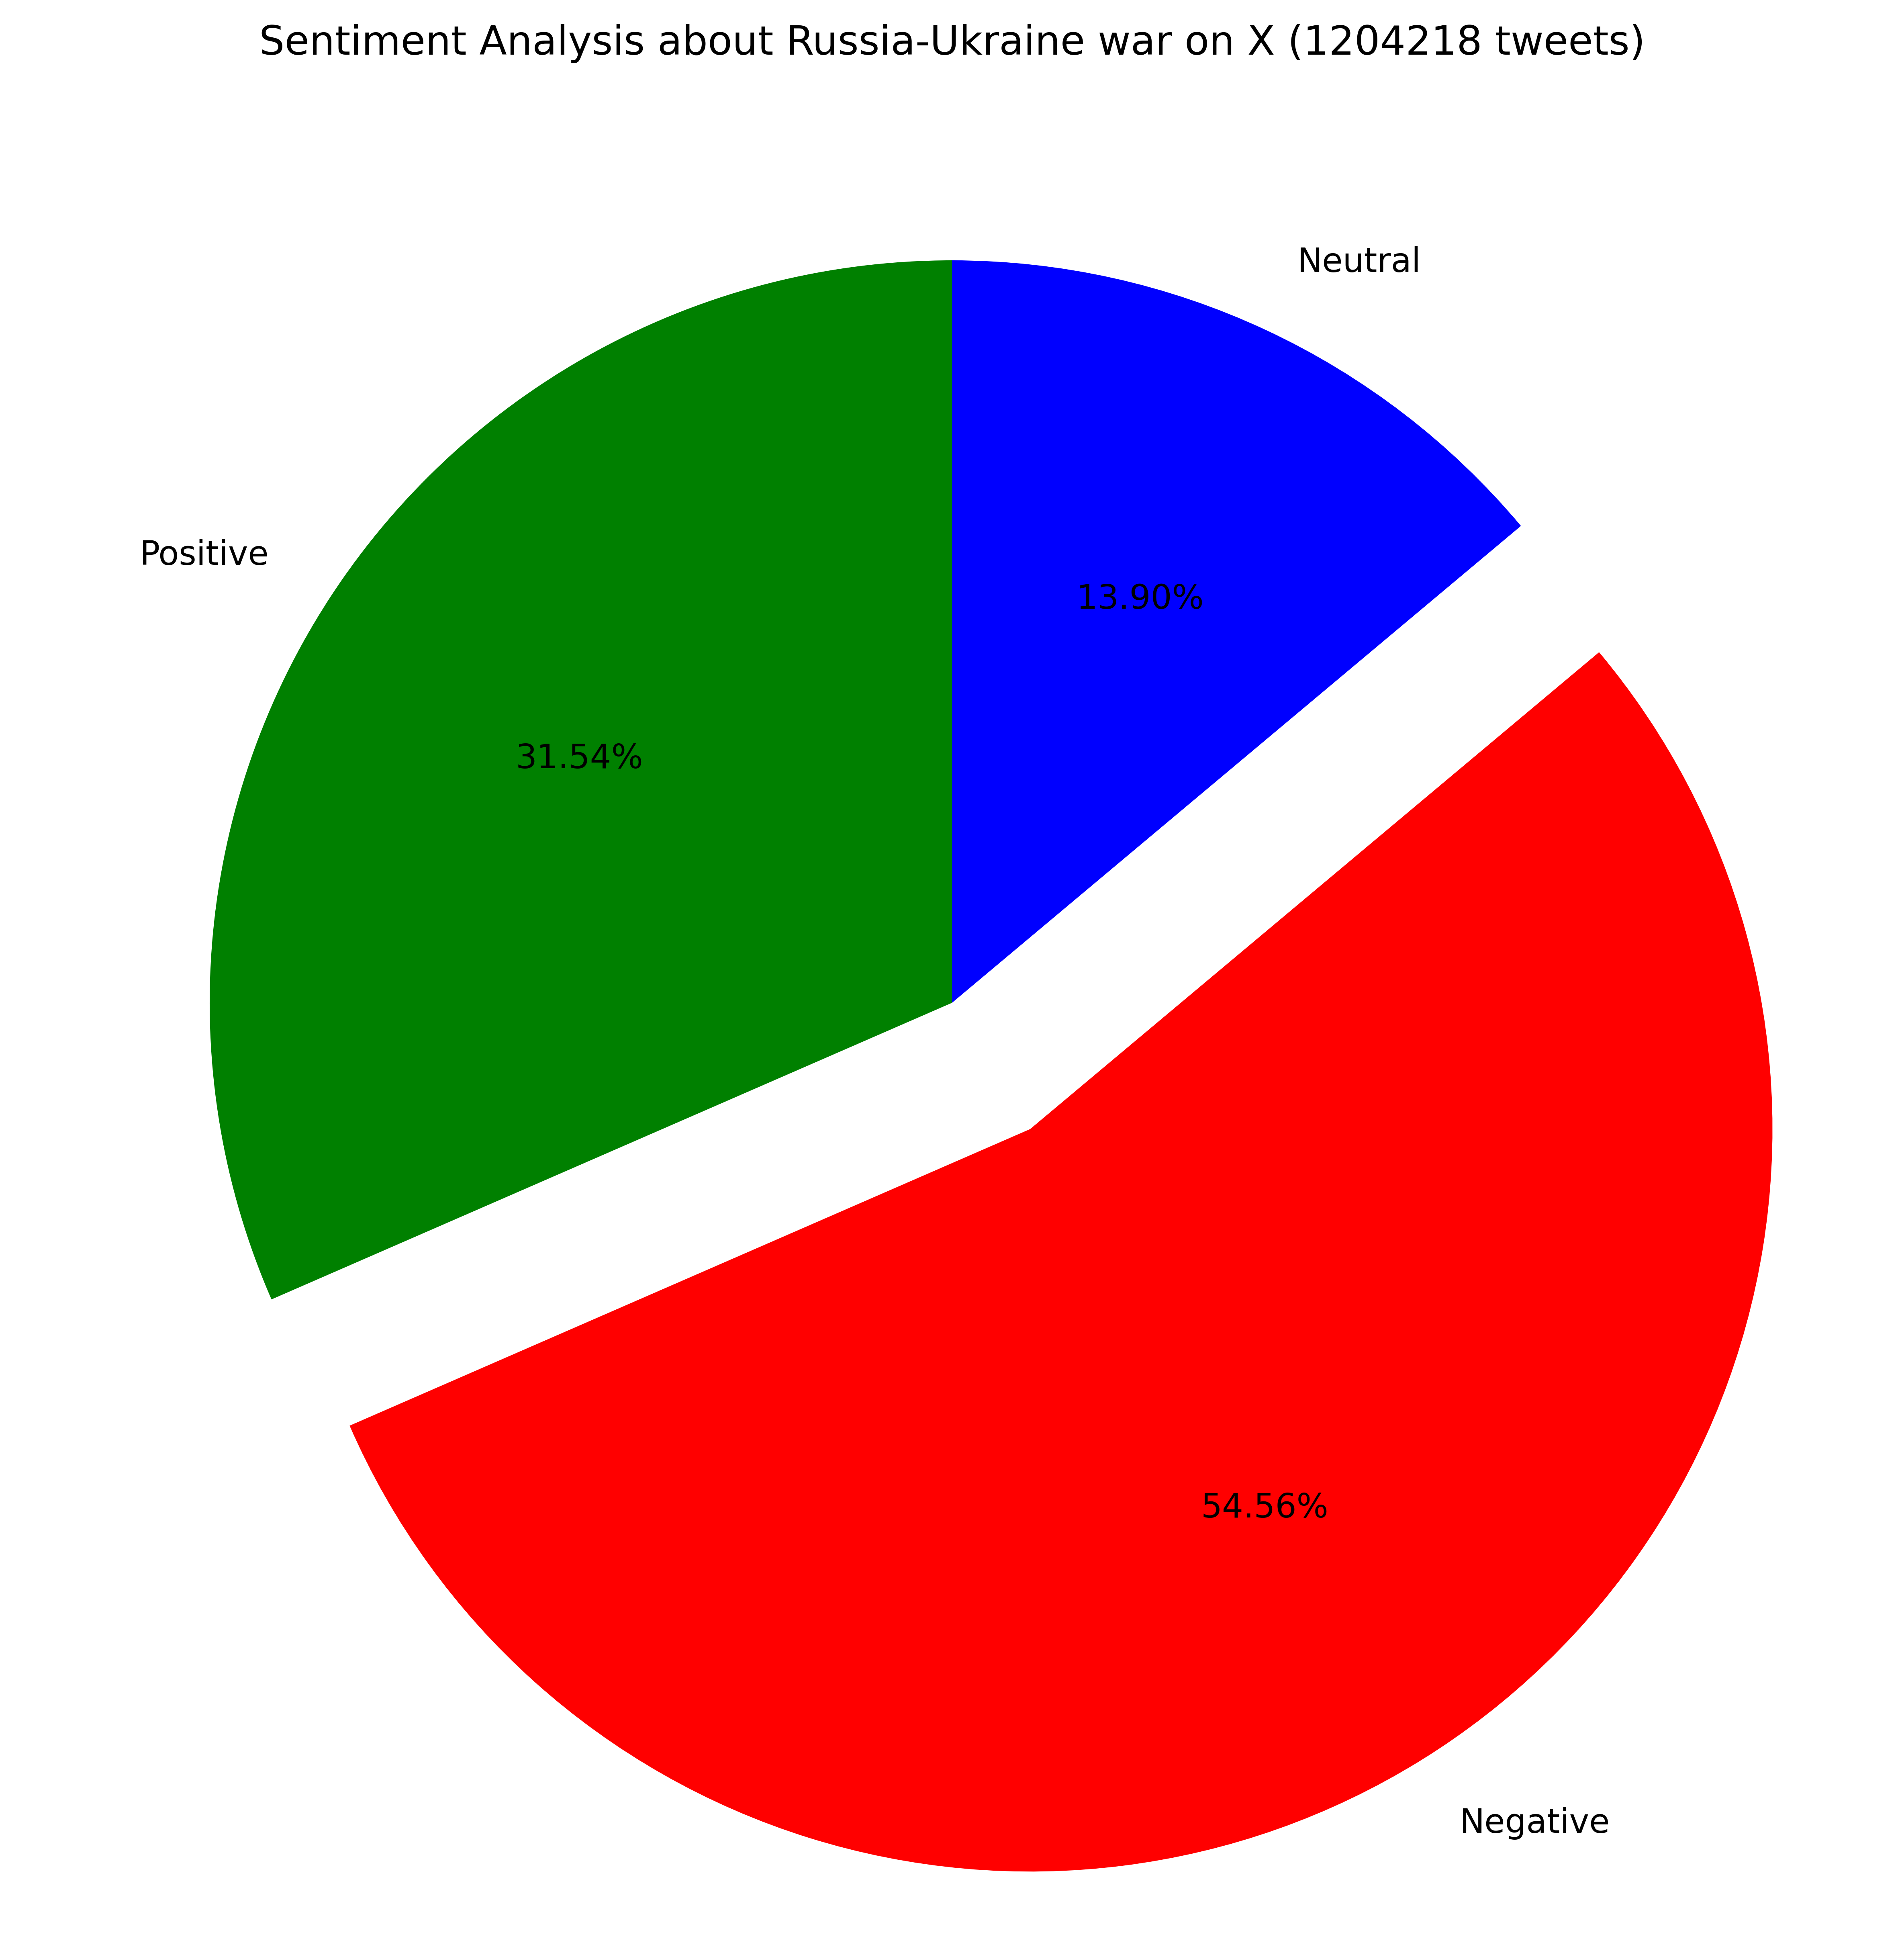

In [19]:
mylabels=["Positive", "Negative", "Neutral"]
mycolors=["Green", "Red", "Blue"]

plt.figure(figsize=(13, 10), 
           dpi=600) # Push new figure on stack
myexplode=[0, 0.2, 0]
plt.pie([total_pos, total_neg, total_neu], colors=mycolors,
        labels=mylabels, explode=myexplode, 
        autopct='%1.2f%%', startangle=90)
plt.title(f"Sentiment Analysis about Russia-Ukraine war on X ({total_tweets} tweets)")
plt.show()

Now, If we want to see the sentiments over 65 days, then we can do that with the help of the below code snippet.

In [20]:
tweets_df = tweets[0]  

pos_list = []
neg_list = []
neu_list = []

for i in tweets_df["date"].unique():
    temp=tweets_df[tweets_df["date"] == i]
    positive_temp=temp[temp["sentiment"] == "positive"]
    negative_temp=temp[temp["sentiment"] == "negative"]
    neutral_temp=temp[temp["sentiment"] == "neutral"]
    total_tweets=temp.shape[0]
    
    if total_tweets!=0:
        pos_percentage=(positive_temp.shape[0] / total_tweets) * 100
        neg_percentage=(negative_temp.shape[0] / total_tweets) * 100
        neu_percentage=(neutral_temp.shape[0] / total_tweets) * 100
    else:
        pos_percentage=0
        neg_percentage=0
        neu_percentage=0

    pos_list.append((pos_percentage, i))
    neg_list.append((neg_percentage, i))
    neu_list.append((neu_percentage, i))

neu_list = sorted(neu_list, key=lambda x: x[1])
pos_list = sorted(pos_list, key=lambda x: x[1])
neg_list = sorted(neg_list, key=lambda x: x[1])

x_cord_neg, y_cord_neg = zip(*neg_list)
x_cord_pos, y_cord_pos = zip(*pos_list)
x_cord_neu, y_cord_neu = zip(*neu_list)

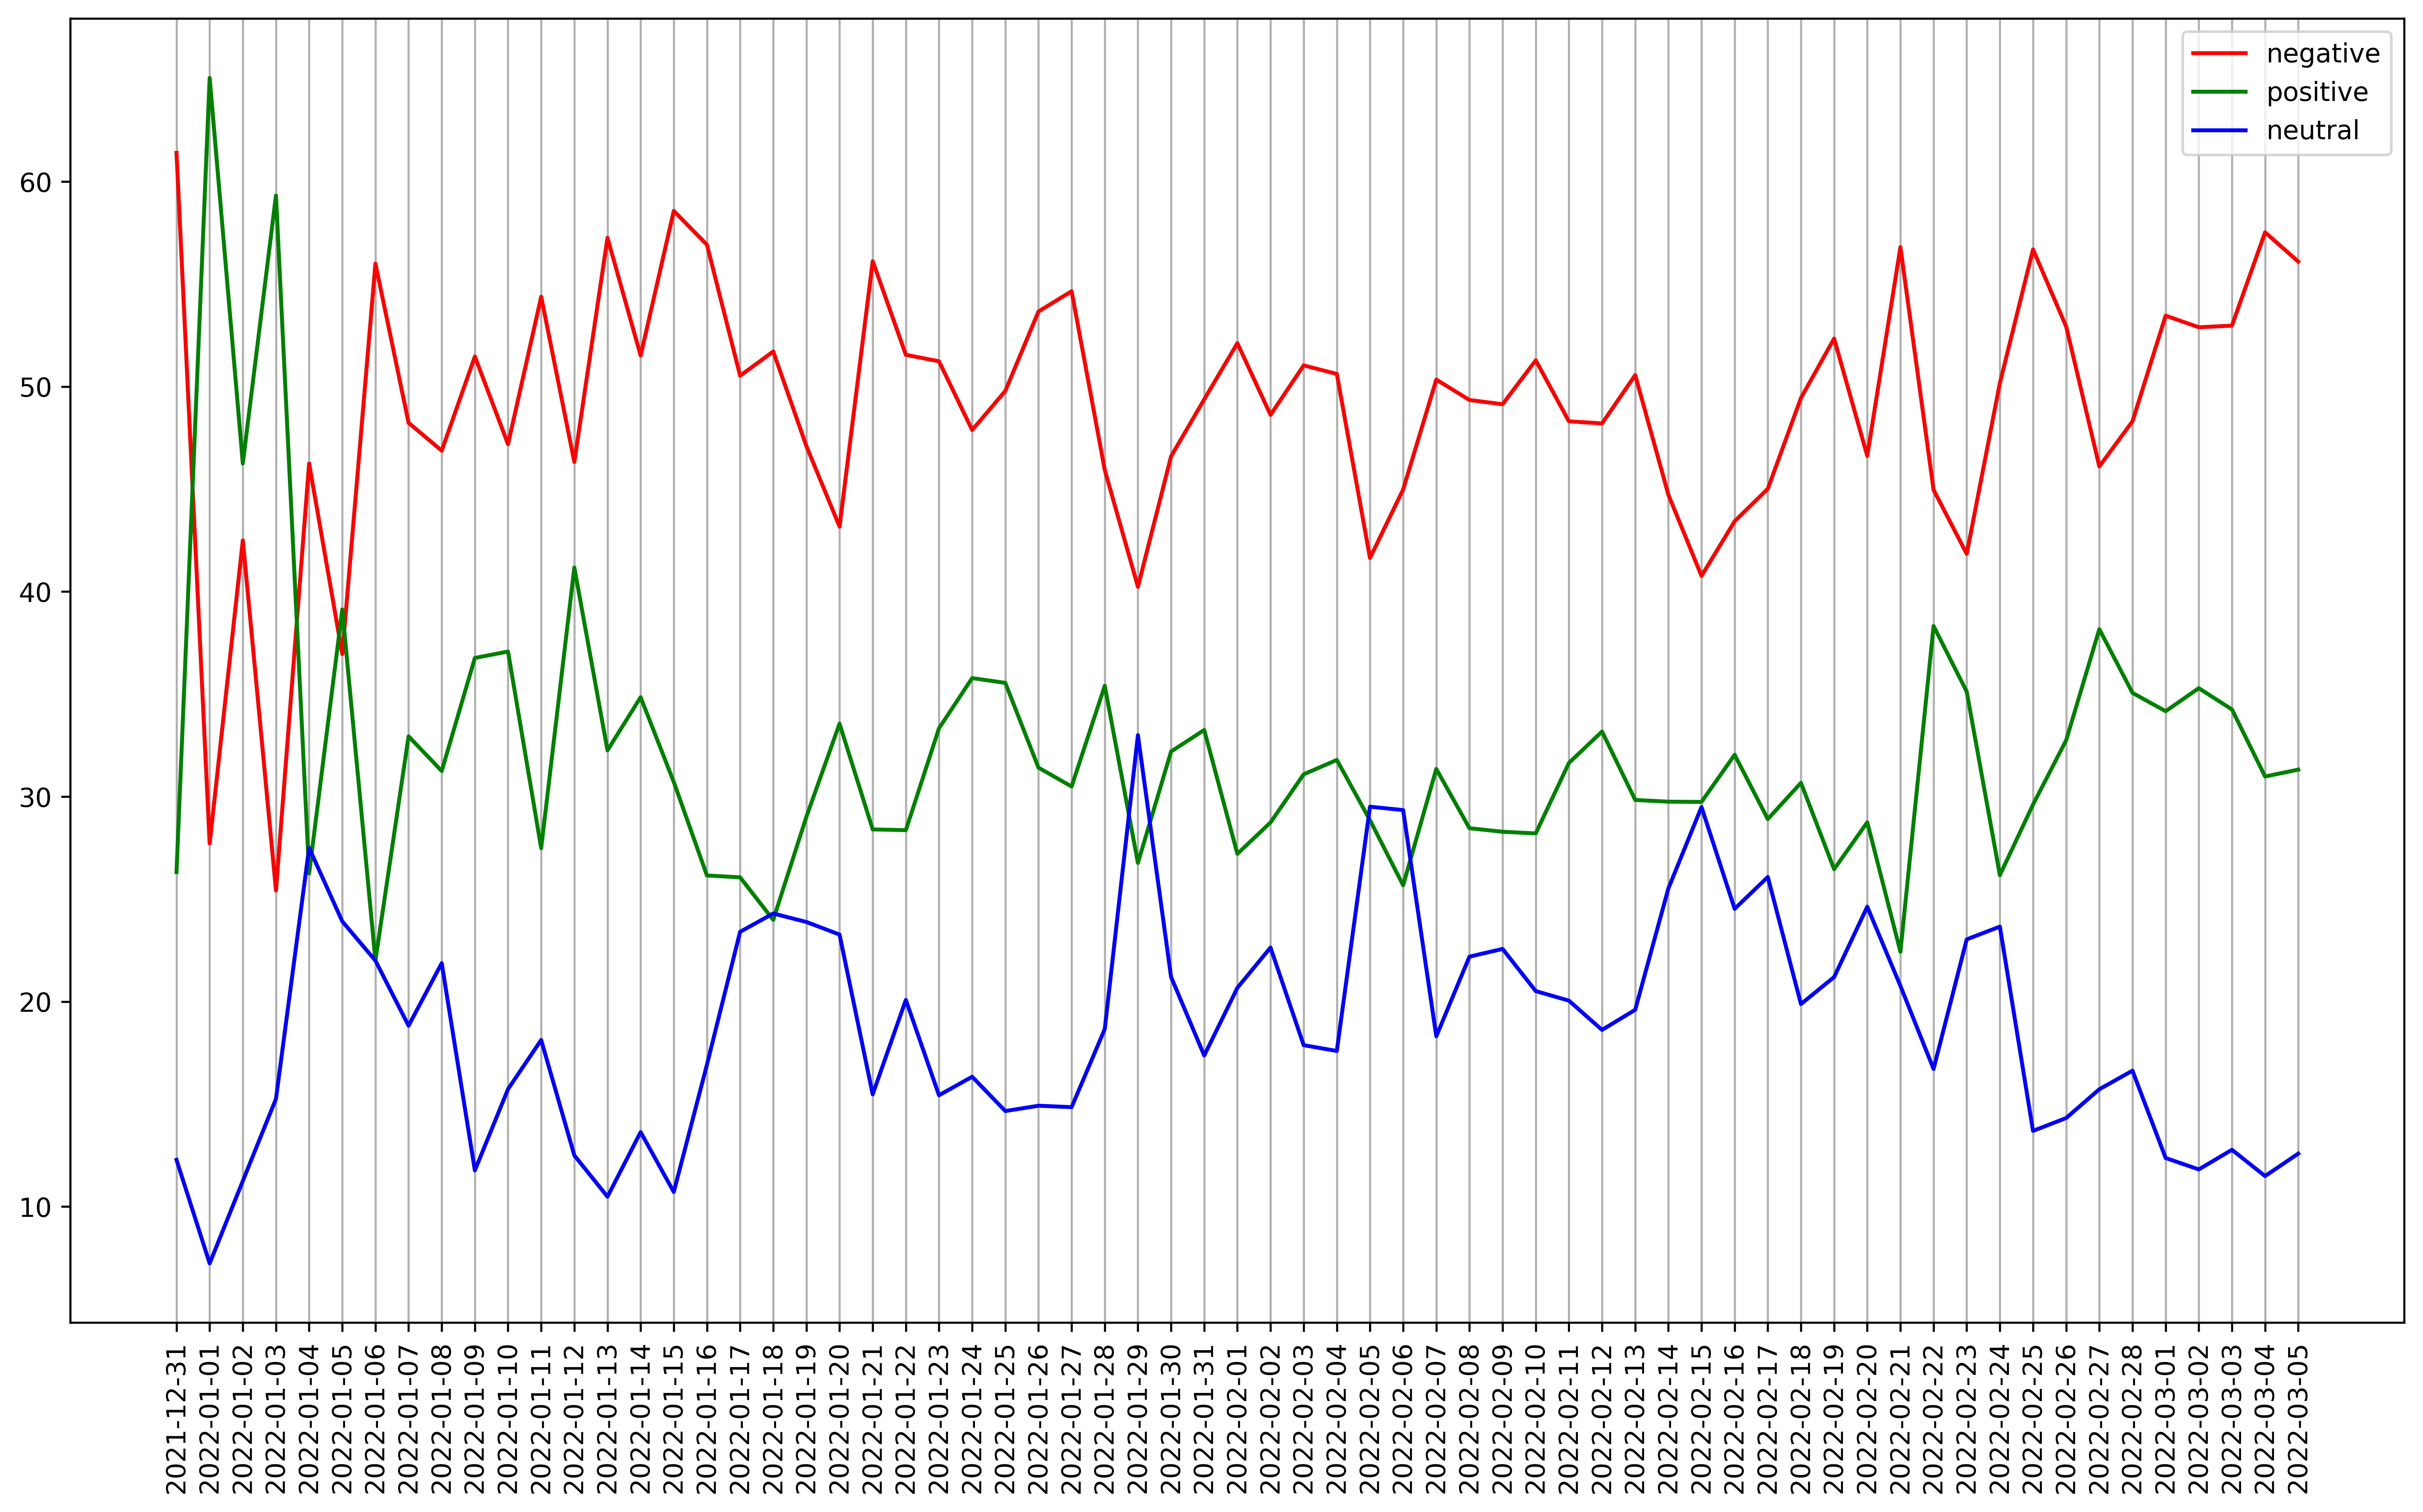

In [21]:
plt.figure(figsize=(16, 9), dpi=600)
plt.plot(y_cord_neg, x_cord_neg, label="negative", color="red")
plt.plot(y_cord_pos, x_cord_pos, label="positive", color="green")
plt.plot(y_cord_neu, x_cord_neu, label="neutral", color="blue")
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.legend()
plt.show()

## Word Popularity using N-gram
We utilized Scikit-Learn's feature extraction module to identify the most frequent individual words and sequences of adjacent words. This process involves creating a Bag of Words model through tokenization, stop word removal, and stemming on preprocessed texts.

In [22]:
# Concatenate all 'content' columns from each DataFrame into a single DataFrame
tw_list=pd.concat([df['content'] for df in tweets], axis=0).to_frame()
tw_list=tw_list.rename(columns={tw_list.columns[0]: 'content'})
tw_list.head()

,content
0,is that the same expensive and ineffective bor...
1,so the americans are dressing up as russ...
2,maybe if one military unit from ukraine crosse...
3,volunteers cross polish border into ukraine to...
4,but theres no russian aircraft flying nea...


In [23]:
# Define a function to remove punctuation from text
def remove_punct(text):
    # Check if text is a string (to handle NaN values)
    if isinstance(text, str):
        # Define punctuation characters to remove
        punctuations=string.punctuation
        # Remove punctuation characters from text
        text=''.join([char for char in text if char not in punctuations])
        return text
    else:
        return ''

# Apply the remove_punct function to each element of the Series
tw_list['punct']=tw_list['content'].apply(remove_punct)

In [24]:
# Applying tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [25]:
# Removing stopwords

stopword=nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text

tw_list['nonstop']=tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [26]:
# Applying Stemmer
ps=nltk.PorterStemmer()

def stemming(text):
    text=[ps.stem(word) for word in text]
    return text

tw_list['stemmed']=tw_list['nonstop'].apply(lambda x: stemming(x))

In [27]:
tw_list.head()

,content,punct,tokenized,nonstop,stemmed
0,is that the same expensive and ineffective bor...,is that the same expensive and ineffective bor...,"[is, that, the, same, expensive, and, ineffect...","[expensive, ineffective, border, wall, smuggle...","[expens, ineffect, border, wall, smuggler, bre..."
1,so the americans are dressing up as russ...,so the americans are dressing up as russ...,"[, so, the, americans, are, dressing, up, as, ...","[, americans, dressing, russians, crossing, ru...","[, american, dress, russian, cross, russian, b..."
2,maybe if one military unit from ukraine crosse...,maybe if one military unit from ukraine crosse...,"[maybe, if, one, military, unit, from, ukraine...","[maybe, one, military, unit, ukraine, crossed,...","[mayb, one, militari, unit, ukrain, cross, bor..."
3,volunteers cross polish border into ukraine to...,volunteers cross polish border into ukraine to...,"[volunteers, cross, polish, border, into, ukra...","[volunteers, cross, polish, border, ukraine, f...","[volunt, cross, polish, border, ukrain, fight,..."
4,but theres no russian aircraft flying nea...,but theres no russian aircraft flying nea...,"[, but, theres, no, russian, aircraft, flying,...","[, theres, russian, aircraft, flying, near, lv...","[, there, russian, aircraft, fli, near, lviv, ..."



In order to determine the most frequently used words, we first require a Bag of Words. The Bag of Words is essentially a matrix where each row corresponds to a particular text, and each column represents a word within the vocabulary. Subsequently, a vector is created, summing up the occurrences of each word across all texts. Put differently, the values within each column of the Bag of Words matrix are aggregated. Finally, the list containing words along with their respective occurrence counts is sorted.

In [28]:
# Define a function to clean and preprocess text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove non-alphanumeric characters and keep spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Apply stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # Join tokens back into a single string
    cleaned_text = ' '.join(stemmed_tokens)
    return cleaned_text

In [29]:
# Applying CountVectorizer
countVectorizer = CountVectorizer(preprocessor=clean_text)
countVector = countVectorizer.fit_transform(tw_list['content'])

In [30]:
# Most used words
word_counts = np.asarray(countVector.sum(axis=0)).reshape(-1)
feature_names = np.array(countVectorizer.get_feature_names_out())
word_count_df = pd.DataFrame({'Word': feature_names, 'Count': word_counts})
top_10_words = word_count_df.sort_values(by='Count', ascending=False).head(10)
print(top_10_words)

           Word    Count
113459   ukrain  1231491
92113    russia   698204
111405    troop   430280
92294   russian   416063
71326      nato   411840
119745      war   364616
13375    border   347270
51668     invad   275443
85771     putin   254137
116348       us   207513


Now to find out the group of adjacent words we will take the help of Unigram and Bigram. Below is the code snippet for the same:

In [31]:
def plot_top_n_gram(corpus, ngram_range, n_top, filename):
    # Function to get top n-grams
    def get_top_n_gram(corpus, ngram_range, n=None):
        vec = CountVectorizer(ngram_range=ngram_range,
                               stop_words='english').fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        return words_freq[:n]

    # Get top n-grams
    top_n_grams = get_top_n_gram(corpus, ngram_range, n_top)
    
    # Plot
    plt.figure(figsize=(8, 5), dpi=600)
    sns_plot = sns.barplot(x=[count for word, count in top_n_grams],
                           y=[word for word, count in top_n_grams])
    plt.xlabel('Frequency')
    plt.ylabel('N-gram')
    plt.title(f'Top {n_top} {ngram_range}-grams')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

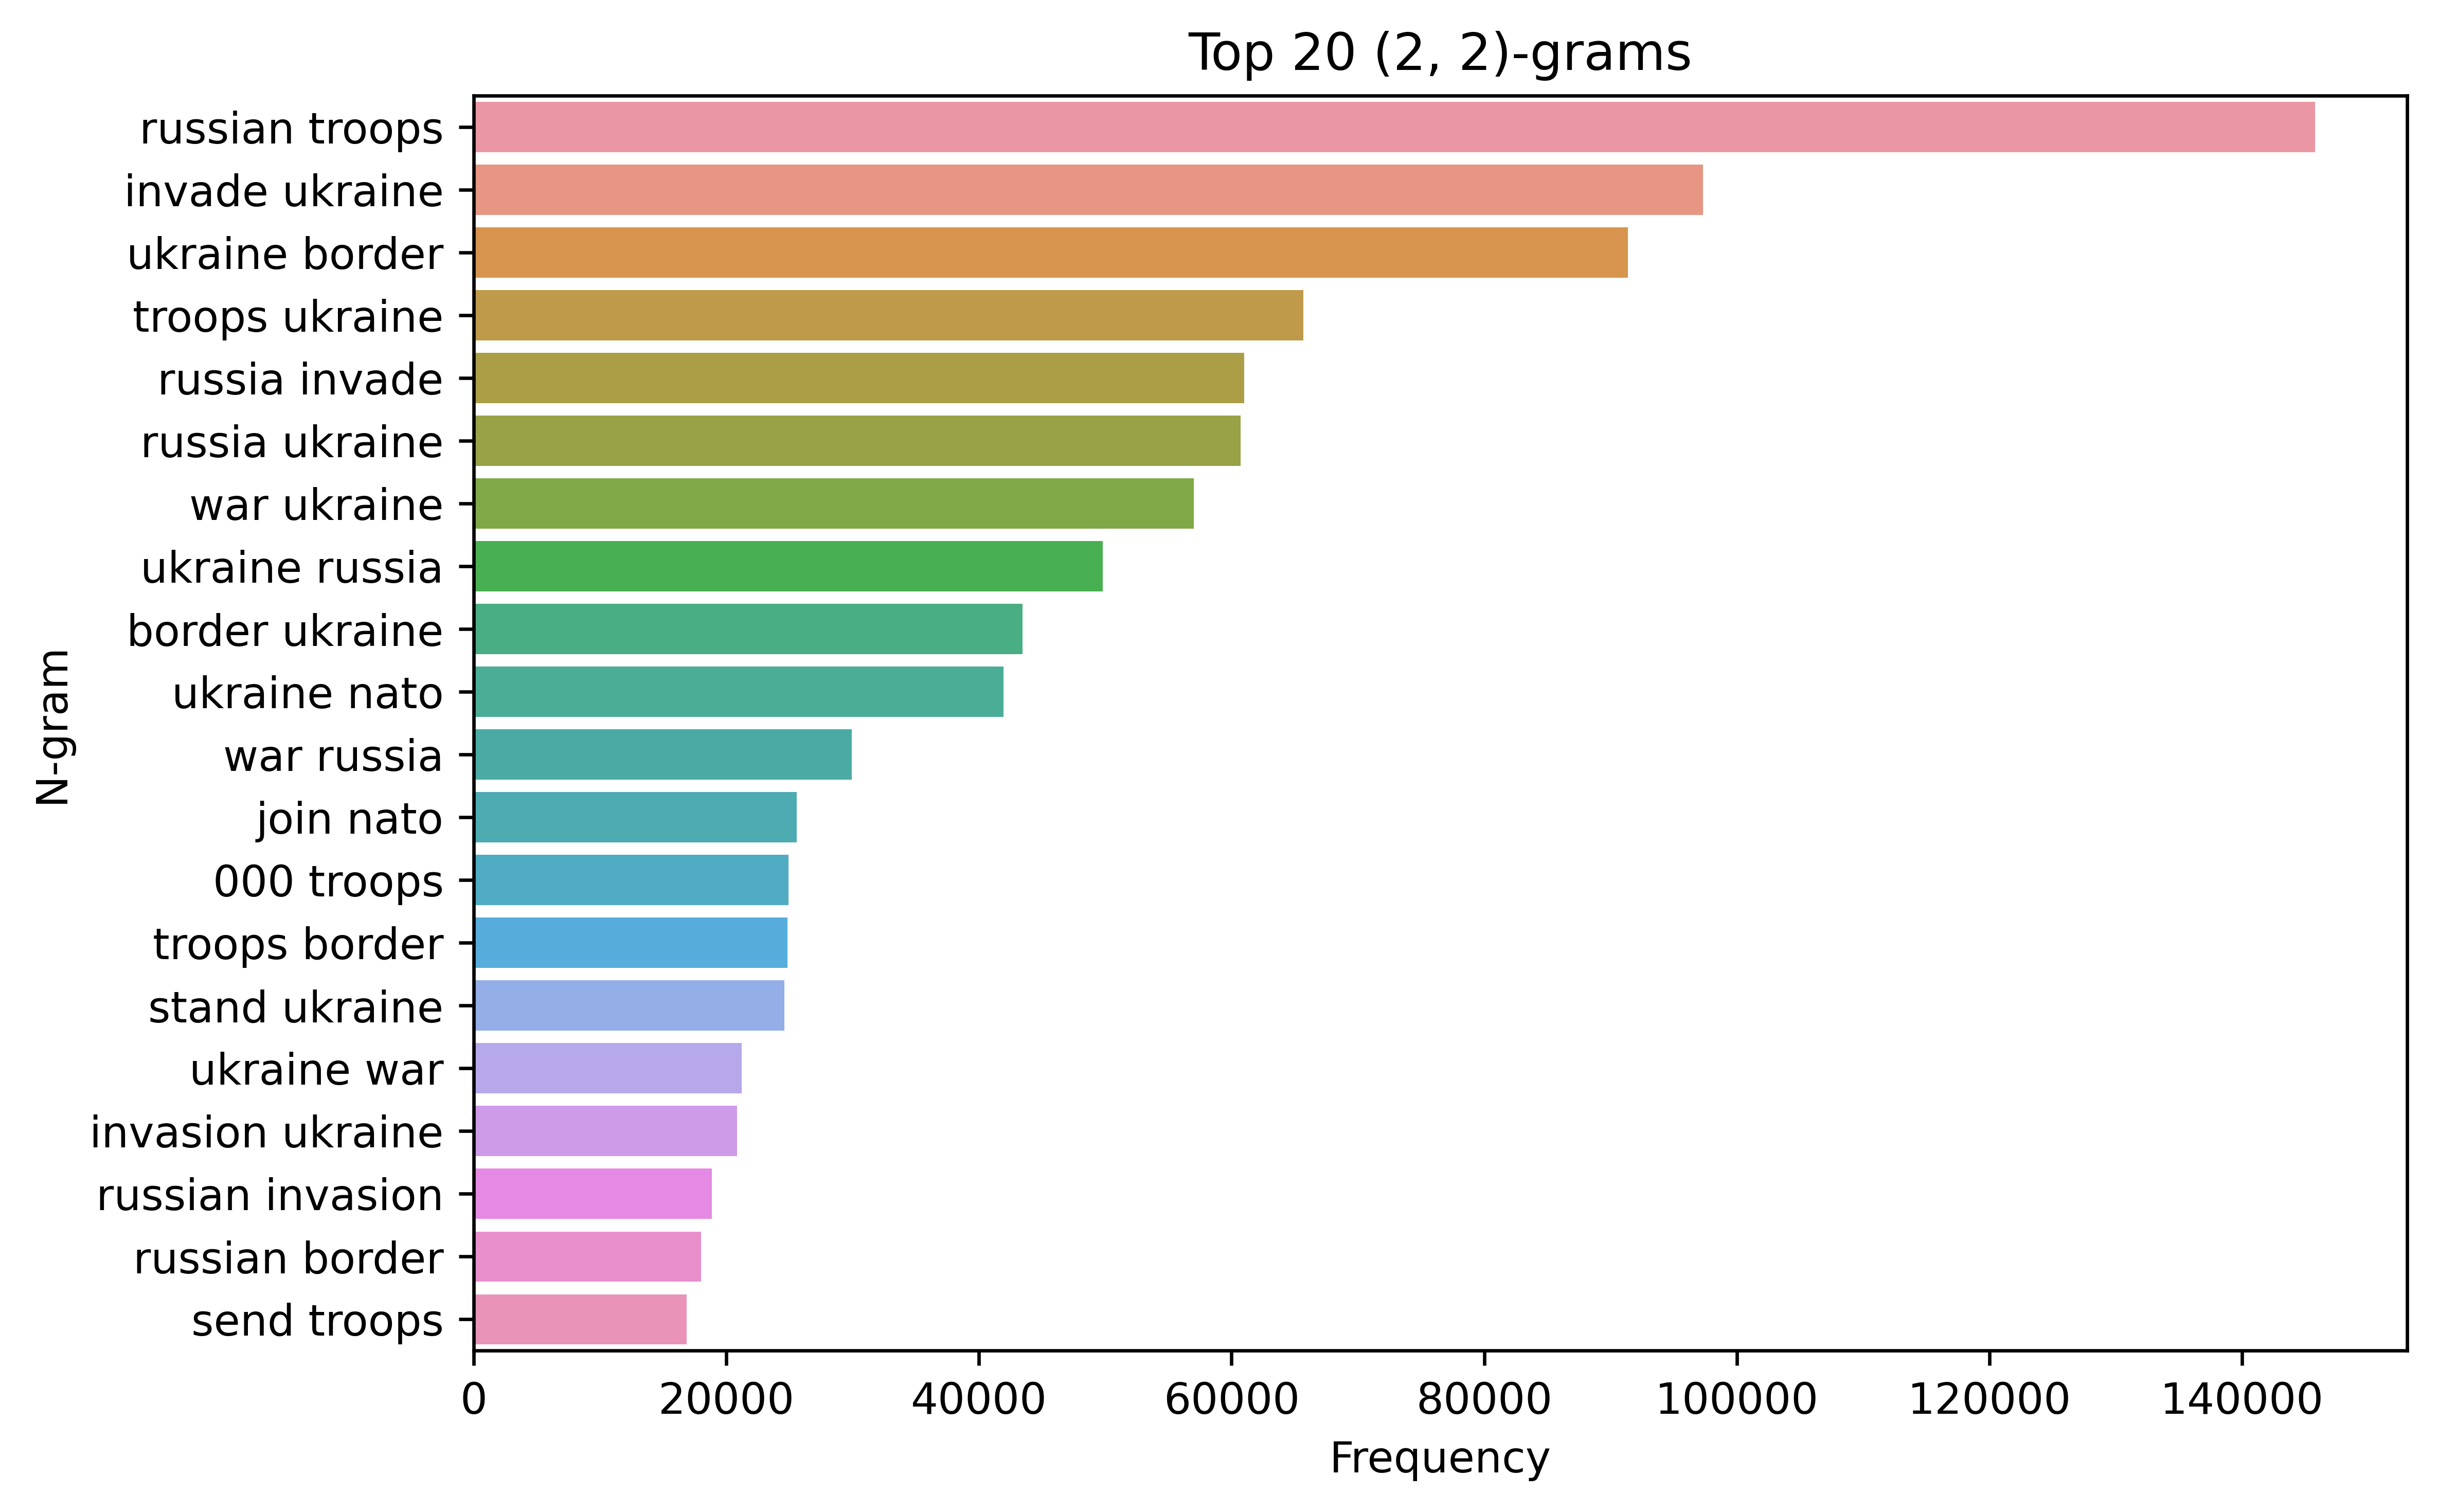

In [32]:
# Plot top bigrams
plot_top_n_gram(tw_list['content'], (2, 2), 20, 'bigram.jpg')

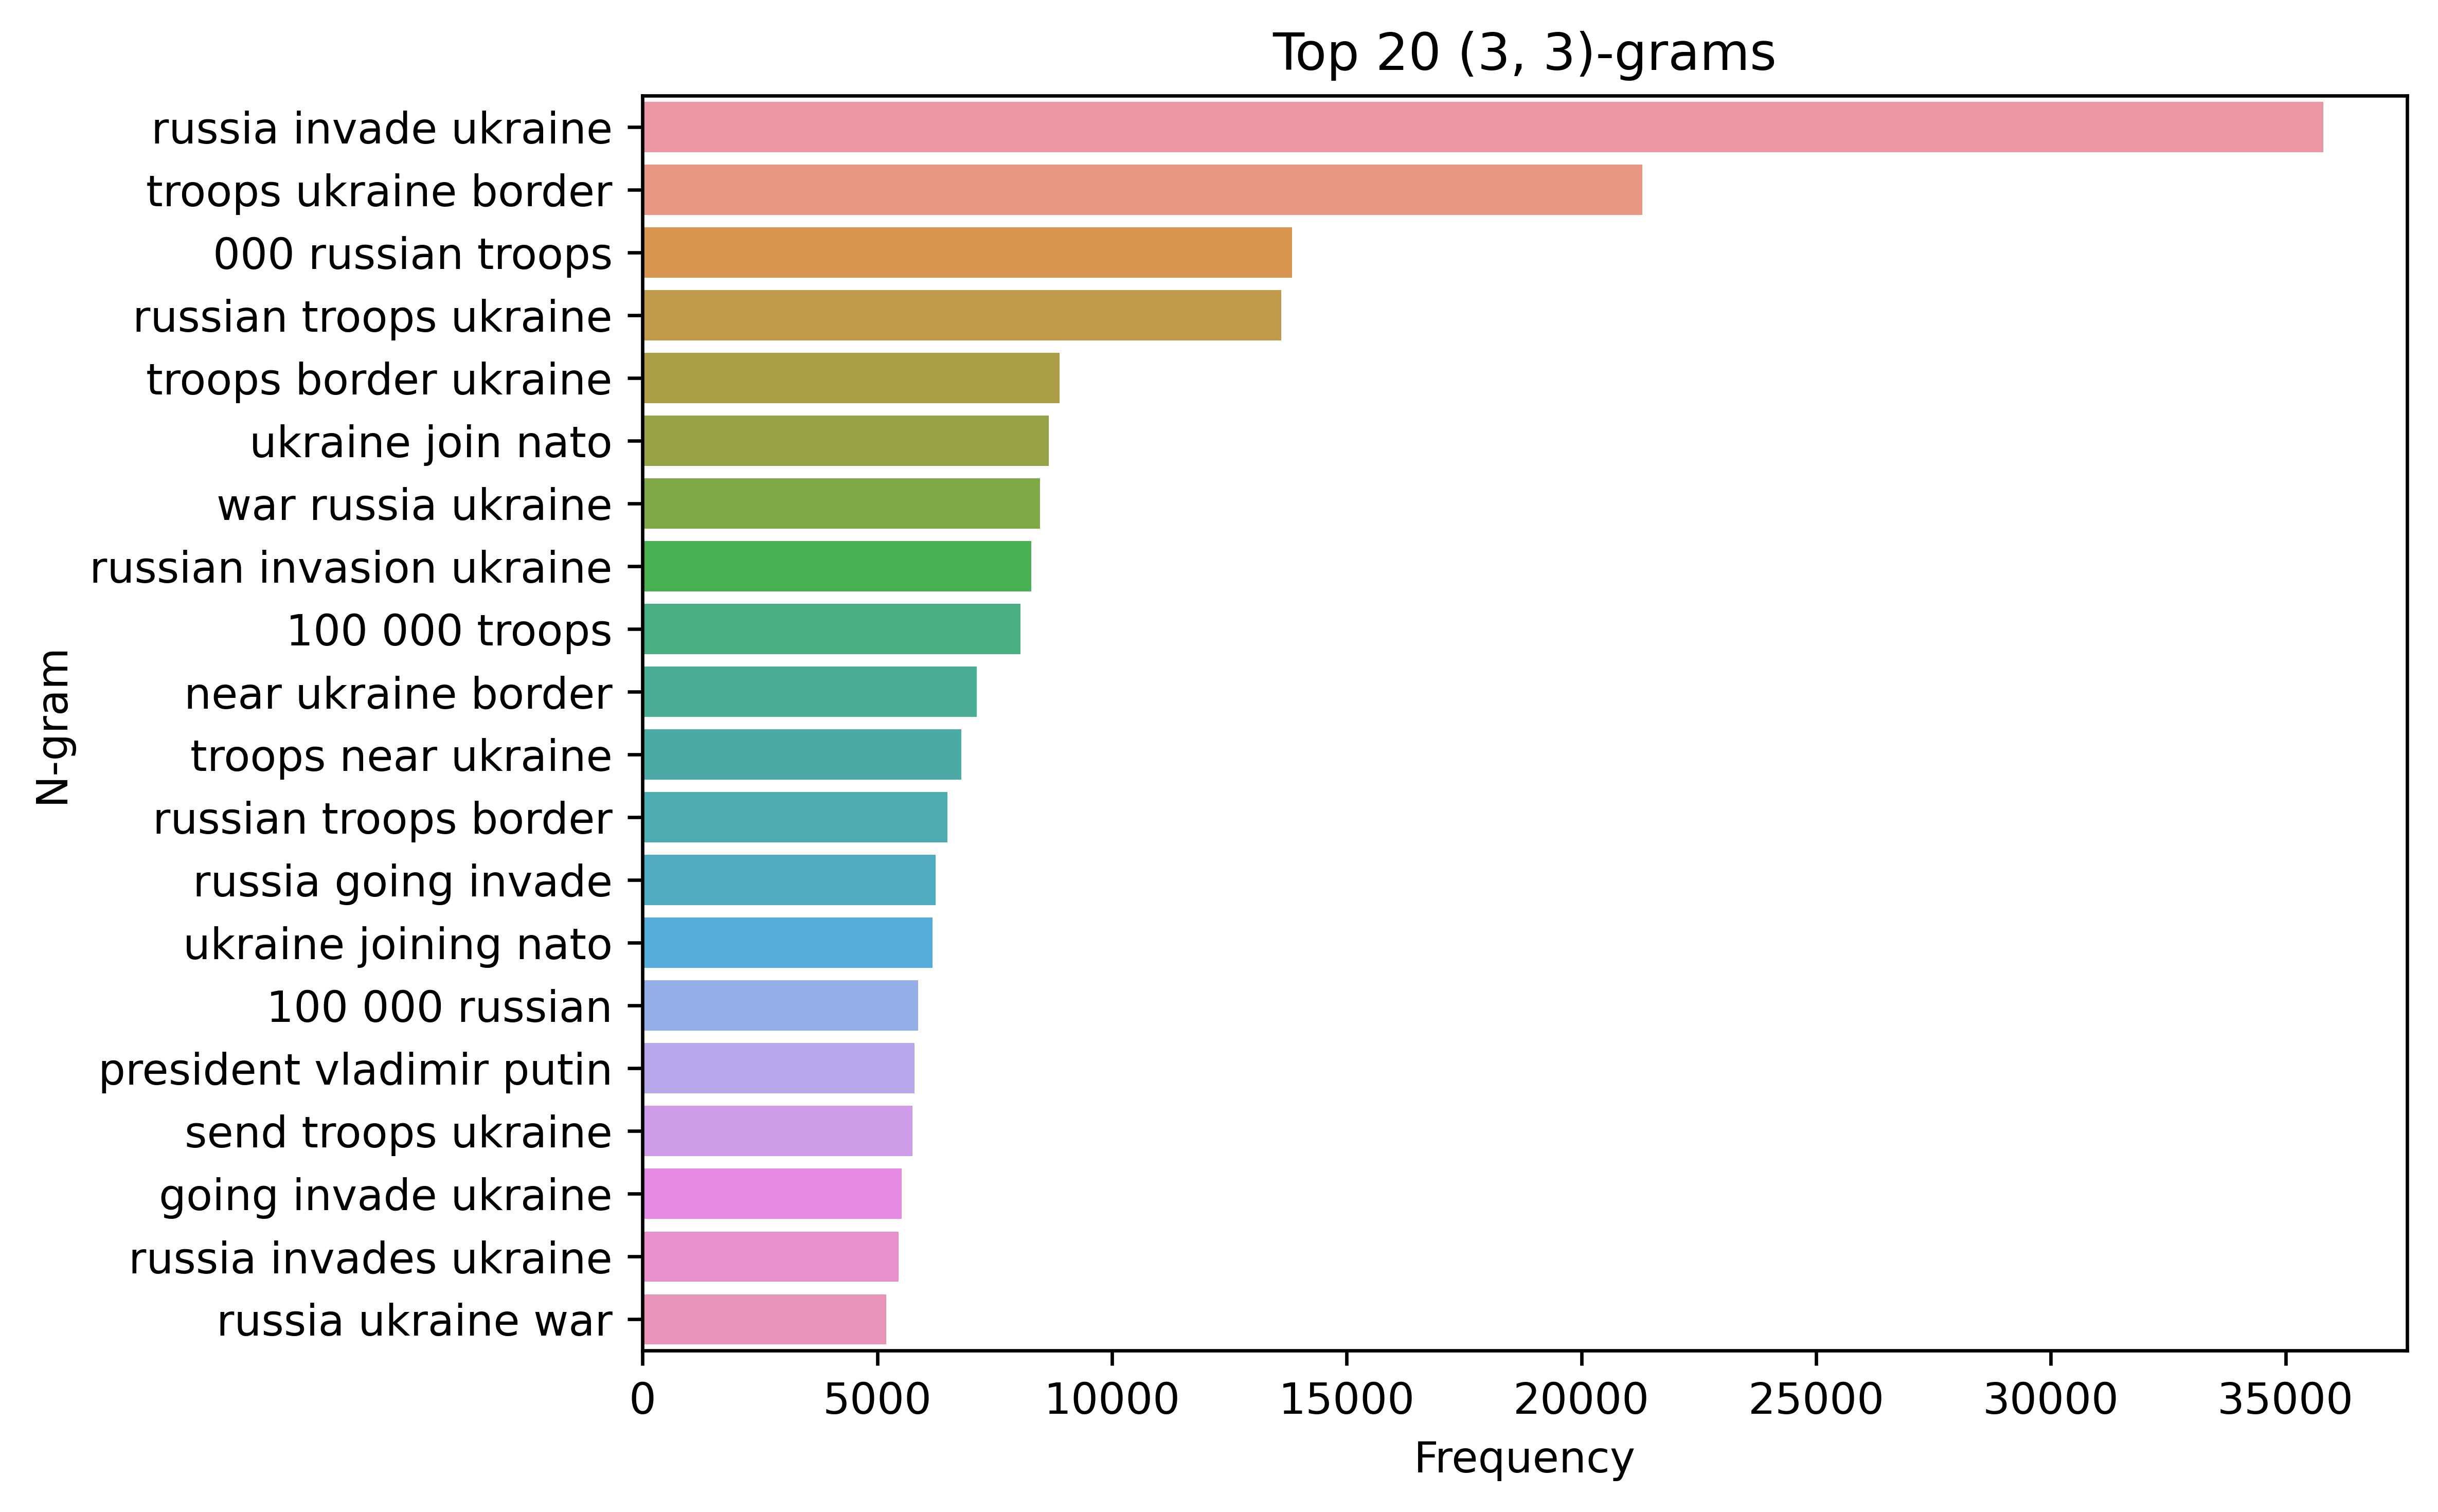

In [33]:
# Plot top trigrams
plot_top_n_gram(tw_list['content'], (3, 3), 20, 'trigram.jpg')

In this code, we performed text analysis on a dataset containing tweets. We applied various text preprocessing techniques including cleaning, tokenization, removal of stopwords, stemming, and n-gram analysis. The data was cleaned by converting text to lowercase, removing URLs, non-alphanumeric characters, and stopwords, and then applying stemming to normalize the words. We used CountVectorizer to convert the cleaned text data into numerical feature vectors, which were then used to identify the most frequent words and n-grams in the dataset. Finally, we visualized the top bigrams and trigrams using bar plots.<br><br>
Overall, this code demonstrates a comprehensive approach to text preprocessing and analysis, showcasing how to extract valuable insights from text data using Python's natural language processing libraries such as NLTK and scikit-learn.